In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from fastai.text import *

In [10]:
path='/home/jupyter/datascience/nlp-disaster-tweet-kaggle/data'

In [25]:
train_df=pd.read_csv(path+'/train.csv')
train_df.head()
df_lm=train_df[['id','text']]
df_lm.shape

(7613, 2)

In [22]:
test_df=pd.read_csv(path+'/test.csv')
test_df.head()
test_df_lm=test_df[['id','text']]
test_df_lm.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [29]:
df_lm.append(test_df_lm,ignore_index=True)

,id,text
0,1,Our Deeds are the Reason of this #earthquake M...
1,4,Forest fire near La Ronge Sask. Canada
2,5,All residents asked to 'shelter in place' are ...
3,6,"13,000 people receive #wildfires evacuation or..."
4,7,Just got sent this photo from Ruby #Alaska as ...
...,...,...
10871,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10872,10865,Storm in RI worse than last hurricane. My city...
10873,10868,Green Line derailment in Chicago http://t.co/U...
10874,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [15]:
doc(TextList.from_csv)

In [30]:
train_df_lm, valid_df_lm = df_lm.loc[:5486,:],df_lm.loc[5486:,:]

In [32]:
data_lm=TextLMDataBunch.from_df(".", train_df_lm, valid_df_lm, text_cols=['text'], bs=64)

In [33]:
data_lm.show_batch()

idx,text
0,orders in xxmaj california xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj
1,comment on the accident issue and xxunk xxunk # xxunk xxbos @aftershock_delo scuf ps live and the game ... xxunk xxbos ' xxmaj the man who can drive himself further once the effort gets xxunk is the man who will win . ' \n xxmaj roger xxmaj xxunk xxbos 320 [ xxup ir ] xxup icemoon [ xxup aftershock ] | http : / / t.co / xxunk |
2,an ambulance xxbos @fouseytube you ok ? xxmaj need a ambulance . xxmaj hahahah that was good ! http : / / t.co / xxunk xxbos xxup ambulance xxup sprinter xxup automatic xxup frontline xxup vehicle xxup choice xxup of 14 xxup lez xxup compliant | ebay http : / / t.co / xxunk xxbos xxmaj pakistan air ambulance helicopter crash kills nine http : / / t.co / xxunk
3,xxmaj annihilation of the xxmaj salt xxmaj river xxmaj wild xxmaj horse ... https : / / t.co / xxunk via @change xxbos xxup u.s xxmaj national xxmaj park xxmaj services xxmaj tonto xxmaj national xxmaj forest : xxmaj stop the xxmaj annihilation of the xxmaj salt xxmaj river xxmaj wild xxmaj horse ... http : / / t.co / xxunk via @change xxbos i 'm gon na fight xxmaj
4,pick for http : / / t.co / thoyhrhkfj xxmaj fan xxmaj army # xxmaj beyhive http : / / t.co / wvj39a3bgm xxbos xxmaj one xxmaj direction xxmaj is my pick for http : / / t.co / q2eblokeve xxmaj fan xxmaj army # xxmaj directioners http : / / t.co / encmhz6y34 xxunk xxbos xxmaj seeing that army of xxunk was the very first thing that has slightly


In [34]:
data_lm.save('data_lm.pkl')

In [35]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


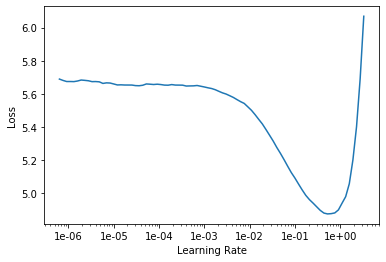

In [37]:
learn.recorder.plot()